In [34]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Wave show

In [22]:
dfs = []
datas = []
for it in range(750):
    temp = []
    for i in range(5):
        filename = "../out/output_%d_%d.dat" % (it, i)
        df = pd.read_table(filename,sep = '\t', header = None)
        df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
        temp.append(df)
    
    df_row_1 = pd.concat([temp[0], temp[1],temp[2], temp[3],temp[4]], axis=1)
#     df_row_2 = pd.concat([temp[2], temp[3]], axis=1)
#     dfs.append(pd.concat([df_row_1, df_row_2]))
    datas.append(df_row_1.values)

<IPython.core.display.Javascript object>


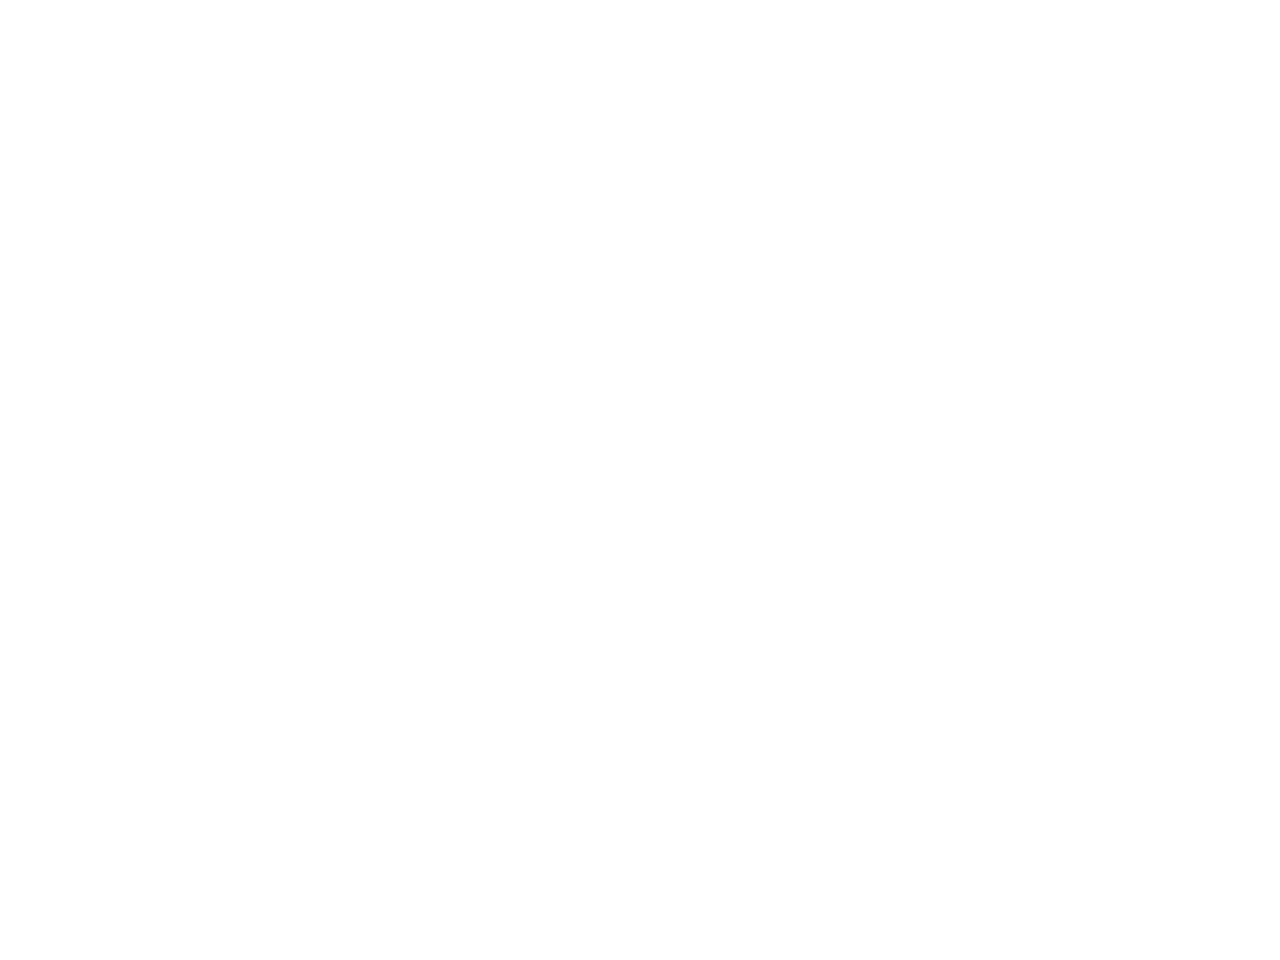

In [23]:
%matplotlib notebook
fig = plt.figure()

img_num = len(datas)

im = plt.imshow(datas[-1], animated=True)
plt.show()

<IPython.core.display.Javascript object>


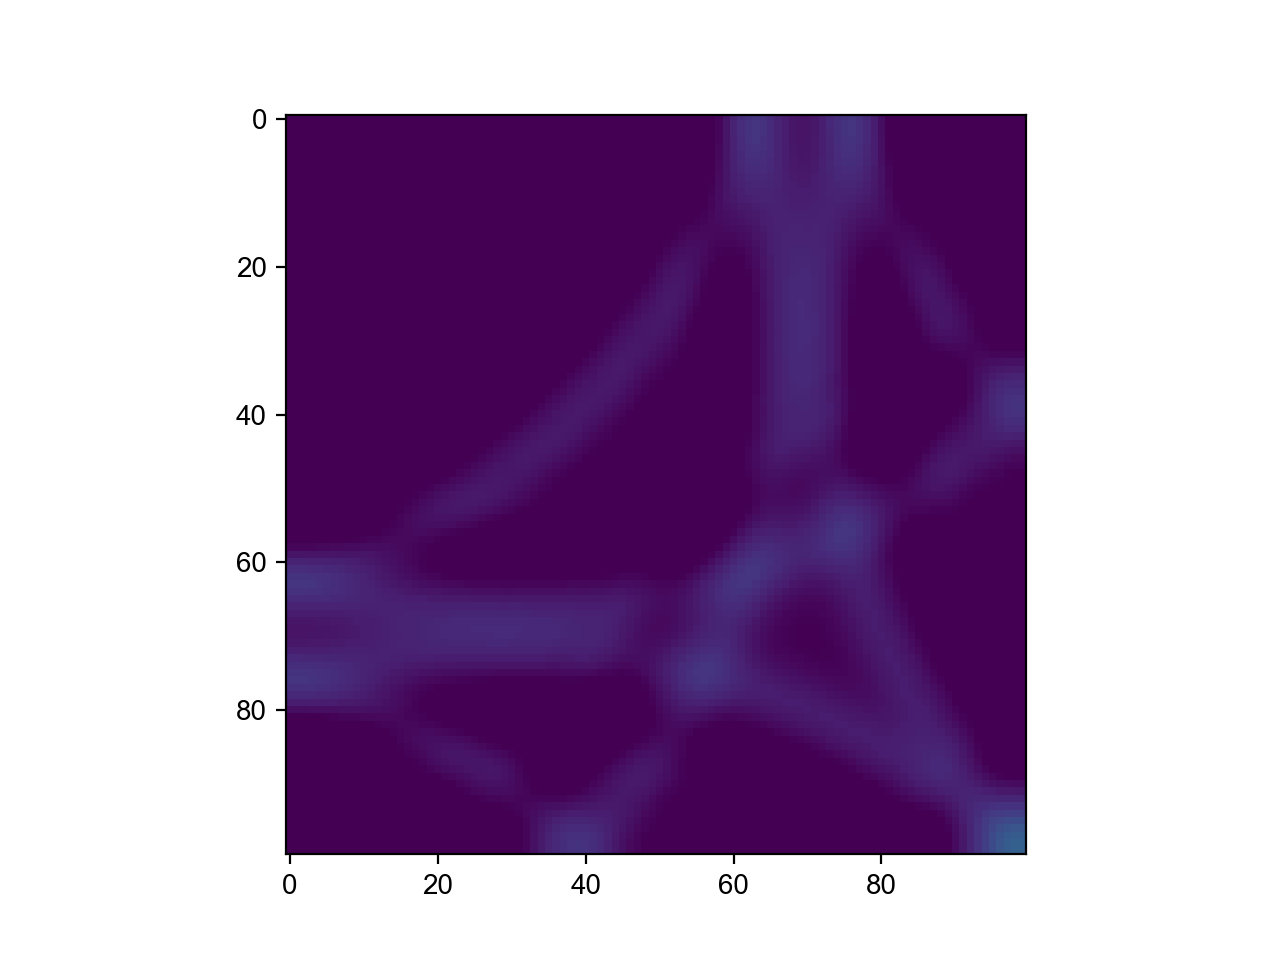

gif generation finished and saved in folder!


In [24]:
%matplotlib notebook
fig = plt.figure()

img_num = len(datas)

im = plt.imshow(datas[0], animated=True)
def updatefig(frame,*args):
    im.set_array(datas[frame])
    return im

ani = animation.FuncAnimation(fig, updatefig, frames=img_num, interval=50, blit=True)
ani.save('../img/dynamic_image.gif', writer='pillow')
plt.show()
print("gif generation finished and saved in folder!")

## Profile

In [58]:
data_path = "../data"
datafiles = os.listdir(data_path)
sorted(datafiles)

colors = ['r.-', 'g.-', 'b.-', 'y.-','c.-','m.-','k.-']

max_process = int(datafiles[0].split(".")[0].split("-")[1])
size = []
for file in datafiles:
    size.append(file.split(".")[0].split("-")[-1])
max_process

32

In [59]:
datafiles

['basic-32-50.npy',
 'basic-32-550.npy',
 'basic-32-350.npy',
 'basic-32-150.npy',
 'basic-32-650.npy',
 'basic-32-450.npy',
 'basic-32-250.npy']

<IPython.core.display.Javascript object>


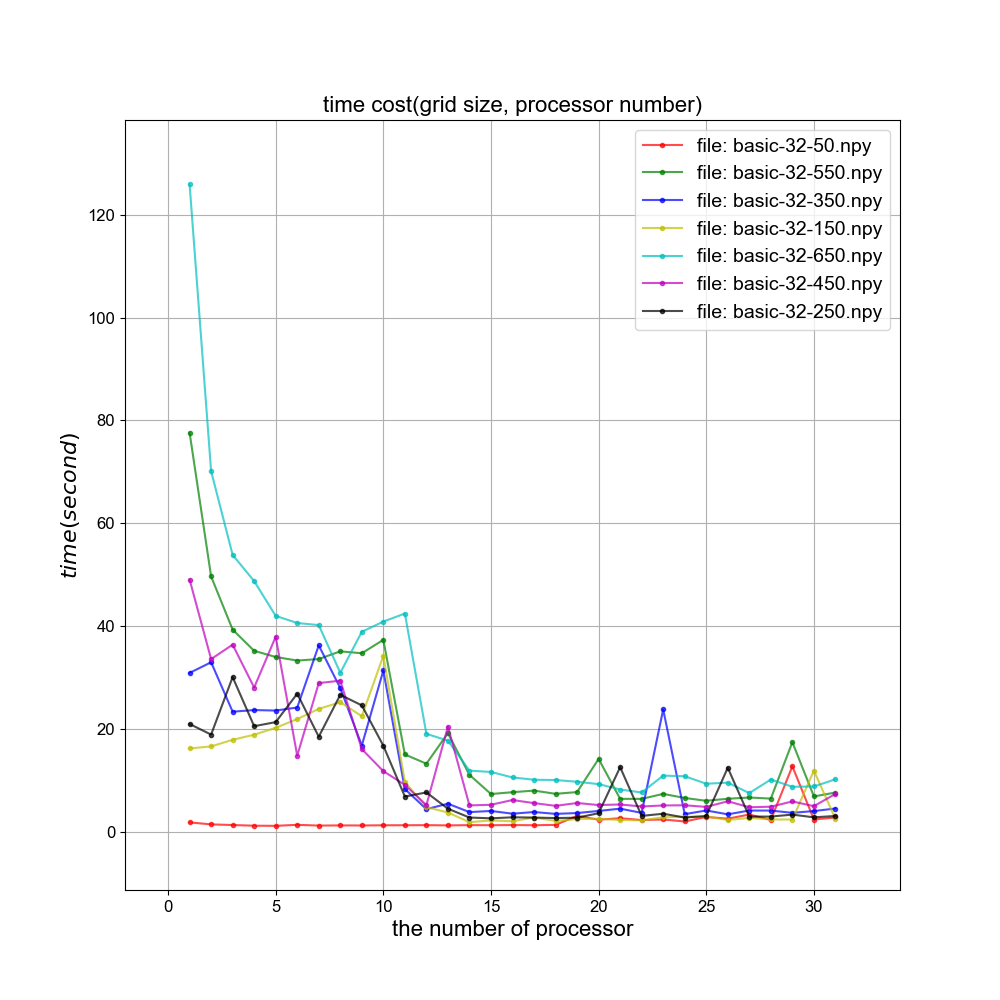

In [60]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

processors = [i for i in range(1, max_process)]
for i in range(len(datafiles)):
    times = np.load(data_path + "/" + datafiles[i])
    ax1.plot(processors, times, colors[i%7], label='file: %s'%datafiles[i], alpha = 0.7)

ax1.set_xlabel('the number of processor', fontsize=16)
ax1.set_ylabel('$time(second)$', fontsize=16)

ax1.set_title('time cost(grid size, processor number)', fontsize=16)
ax1.legend(loc='best', fontsize=14);
plt.savefig("../img/compare.png")

<IPython.core.display.Javascript object>


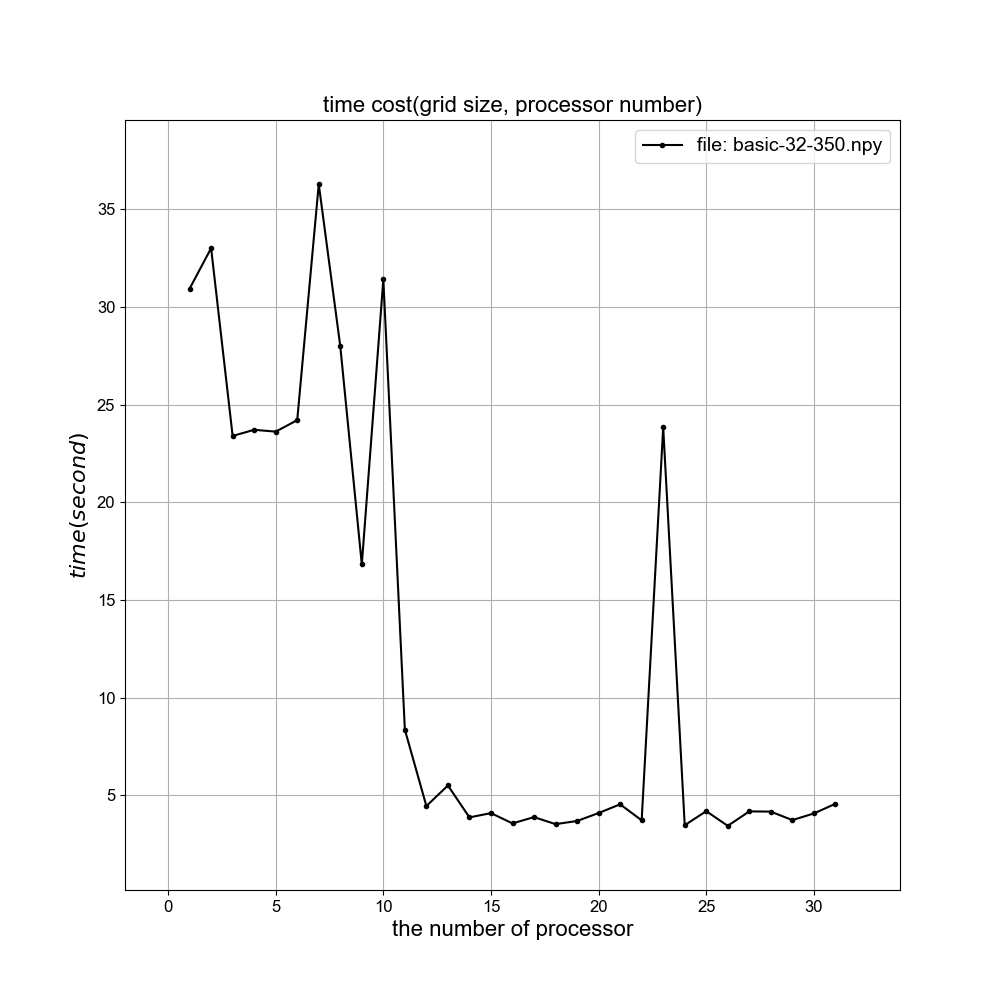

In [47]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

processors = [i for i in range(1, max_process)]
times = np.load(data_path + "/" + datafiles[2])
ax1.plot(processors, times, colors[i%7], label='file: %s'%datafiles[2])

ax1.set_xlabel('the number of processor', fontsize=16)
ax1.set_ylabel('$time(second)$', fontsize=16)

ax1.set_title('time cost(grid size, processor number)', fontsize=16)
ax1.legend(loc='best', fontsize=14);
plt.savefig("../img/runtime_32_150.png")

In [63]:
size = [100, 200, 300, 400, 500]
processor = [1, 2, 4, 6, 8, 16, 32, 64]

times = np.array([[0.826358, 0.429770, 0.274431, 0.153217, 0.139374, 0.095648,0.066701, 0.044583],
                  [6.830265,  4.023397,1.100592,1.375237,0.982489,0.477043,0.284944, 0.205250],
                  [21.968369, 12.252635, 4.754731,4.082182,3.255784, 1.773239,2.032061,0.706340],
                  [57.299876, 19.325800, 15.311889,11.854220, 8.438050,3.905155,2.028541, 1.218338],
                  [ 112.739056, 63.226738, 27.934968,18.970527,11.956663, 8.181969,4.297583, 2.655973]])

<IPython.core.display.Javascript object>


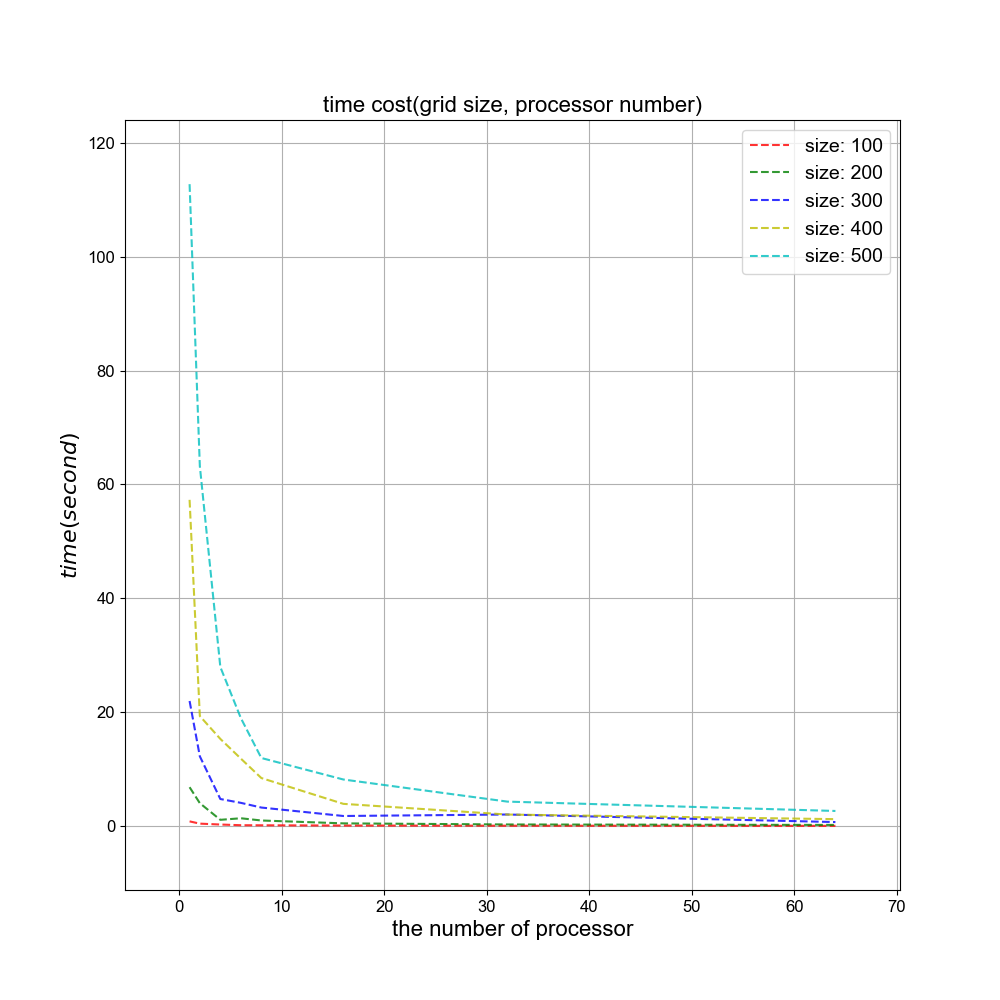

In [64]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)


colors_2 = ['r--', 'g--', 'b--', 'y--','c--','m--','k--']
for i in range(len(times)):
    ax1.plot(processor, times[i], colors_2[i%7], label='size: %s'%size[i], alpha = 0.8)

ax1.set_xlabel('the number of processor', fontsize=16)
ax1.set_ylabel('$time(second)$', fontsize=16)

ax1.set_title('time cost(grid size, processor number)', fontsize=16)
ax1.legend(loc='best', fontsize=14);
plt.savefig("../img/compareByPbs.png")